In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import time
import datetime

%matplotlib inline

In [2]:
# Load dataset
data_train = pd.read_csv('datasets/CleanDataTrain.csv')

In [3]:
# Print DataFrame information
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97230 entries, 0 to 97229
Columns: 104 entries, match_id to radiant_win
dtypes: float64(12), int64(92)
memory usage: 77.1 MB
None


In [4]:
# Segregate features and labels into separate variables
X,y = data_train.iloc[:,0:103] , data_train.iloc[:,103]

In [5]:
# Inspect data
X.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
result = []
n = [10, 20, 30, 100, 200, 300]

In [7]:
import numpy as np
for i in n:
    print(i)
    model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    start_time = datetime.datetime.now()
    model_score = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_score)
    result.append(np.mean(model_score))

10
Time elapsed: 0:00:12.960287
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
20
Time elapsed: 0:00:20.556244
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
30
Time elapsed: 0:00:28.788461
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
100
Time elapsed: 0:01:32.255990
[0.70514599 0.706077   0.70435257 0.7074682  0.7081182 ]
200
Time elapsed: 0:03:00.782454
[0.71213094 0.71305016 0.71228251 0.71555064 0.71549651]
300
Time elapsed: 0:04:29.978930
[0.71677636 0.7158072  0.71694095 0.71897862 0.71874826]


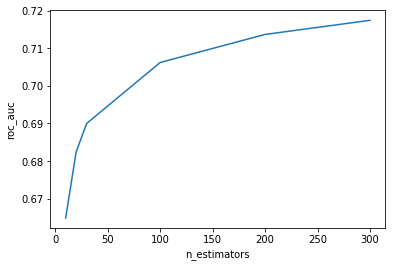

In [10]:
plt.plot(n, result)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

1. Долго ли настраивались классификаторы?
От 12 секунд для 10 деревьев до 4 минут 30 секунд для 300 деревьев. 
Чтобы уменьшить время обучения, возможно снизить выборку количества обьектов и ограничить глубину дереьев.
2. Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?
Качество растет с 0,69 до 0,72 при увеличении числа деревьев на порядок (с 30 до 300).